## In order to quantize data, we have to decide how wide each bin should be. 

**The solution fall into two categories:**
    
    - fixed-width
    - adaptive

> Fixed-width binning is easy to compute. but if there are large gaps in the counts, then there will be many empty bins with no data.

> This problem can be solved by adaptively positioning the bins based on the distribution of the data. This can be done using the quantiles of the distribution.


---

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [2]:
# Load business data 

biz_data = open('../data/yelp_dataset/yelp_academic_dataset_business.json', 
                        encoding='utf-8')

In [3]:
# create a pandas dataframe of the data

bizdf = pd.DataFrame([json.loads(x) for x in biz_data.readlines()])
biz_data.close()

#### Using Quantiles

In [4]:
# Map to evenly spaced using quantiles

deciles = bizdf['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     9.0
0.6    12.0
0.7    19.0
0.8    31.0
0.9    66.0
Name: review_count, dtype: float64

Text(0,0.5,'Occurrence')

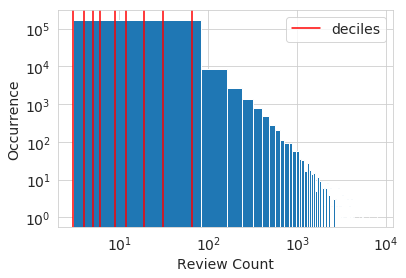

In [5]:
# Plot the histogram of the review counts

sns.set_style('whitegrid')
fig, ax = plt.subplots()
bizdf['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
    
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)